# Phase separation

© 2022 Tom Röschinger. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.special import factorial
%matplotlib inline


sns.set()

## Entropy

In [14]:
def xlogx(x):
  if x == 0:
    ret = 0
  # elif x == 1:
  #   ret = 0
  else:
    ret = x*np.log(x)
  return ret

def entropy(phi):
  # e = - phi*np.log(phi) - (1-phi*np.log(1-phi))
  e = - xlogx(phi) - xlogx(1-phi)
  return e

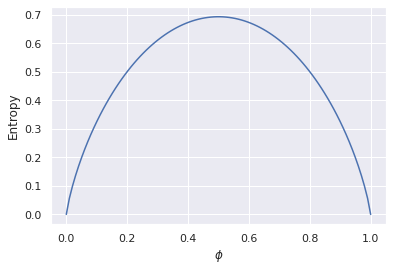

In [15]:
fig,ax = plt.subplots(1,1)

ax.set_xlabel(r"$\phi$");
ax.set_ylabel("Entropy")

phi_range = np.linspace(0,1,100)

S = [entropy(phi) for phi in phi_range]

ax.plot(phi_range, S);

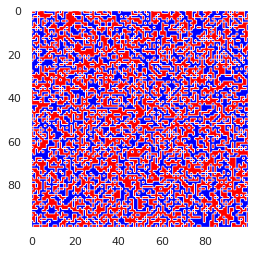

In [35]:
phi = 0.5
N = 100

grid = np.random.choice([0,1], size = (N,N), p=[phi, 1-phi])

plt.imshow(grid, cmap='bwr_r');
plt.grid(False);

In [54]:
def eval_grid(mat):
  en = 0
  for   i in range(1, np.size(mat, 0) - 1):
    for j in range(1, np.size(mat, 1) - 1):

      en += V_arr[mat[i,j] + mat[i  ,j+1]]
      en += V_arr[mat[i,j] + mat[i  ,j-1]]
      en += V_arr[mat[i,j] + mat[i+1,j  ]]
      en += V_arr[mat[i,j] + mat[i-1,j  ]]

  return en/2/np.size(mat)


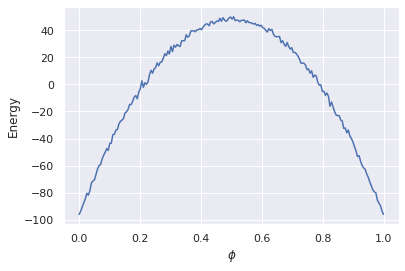

In [56]:
V_RR = -50
V_BB = -50
V_BR = 100 # R and B repel
V_arr = [V_RR, V_BR, V_BB]

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel('Energy')
energies = [eval_grid(np.random.choice([0,1], size=(N,N), p=[phi, 1-phi])) for phi in np.linspace(0,1,200)]
ax.plot(np.linspace(0,1,200),energies);

In [80]:
V_RR = -50
V_BB = -50
V_RB = -100 # R and B attract
V_arr = [V_RR, V_BR, V_BB]

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel('Energy')
energies = [eval_grid(np.random.choice([0,1], size=(N,N), p=[phi, 1-phi])) for phi in np.linspace(0,1,200)]
ax.plot(np.linspace(0,1,200),energies);

<IPython.core.display.Javascript object>

In [81]:
def energy(phi,V_RR, V_BB, V_RB, Z=4):
  v_eff = Z / 2 * (phi**2 * V_RR + (1 - phi)**2 * V_BB * phi * (1-phi)*V_RB)
  return v_eff

In [82]:
y = [energy(phi, V_RR, V_BB, V_RB) for phi in np.linspace(0,1,100)]
ax.plot(np.linspace(0,1,100),y);
fig

<IPython.core.display.Javascript object>

In [83]:
import panel as pn

pn.extension()
%matplotlib notebook

slider_vrr = pn.widgets.FloatSlider(name="V_RR", start=-50, end=  0,value=-50, step=1)
slider_vbb = pn.widgets.FloatSlider(name="V_BB", start=-50, end=  0,value=-50, step=1)
slider_vrb = pn.widgets.FloatSlider(name="V_RB", start=-50, end=200,value=-50, step=1)

In [92]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r"$\phi$")
ax.set_ylabel("Energy")
phi_range = np.linspace(0,1,100)
y = [energy(phi, V_RR=slider_vrr.value, V_BB=slider_vbb.value, V_RB=slider_vrb.value)for phi in phi_range]
line1, = ax.plot(phi_range,y);

@pn.depends(
    V_RR=slider_vrr,
    V_BB=slider_vbb,
    V_RB=slider_vrb
    )

SyntaxError: ignored